In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('df_sucio.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000.0,USD,100000,MU,0.0,MU,S
1,2020,EN,CT,Staff Data Analyst,60000.0,CAD,44753,CA,NaN,CA,L
2,2020,SE,FT,Staff Data Scientist,164000.0,USD,164000,US,50.0,US,M
3,2020,EN,FT,Data Analyst,42000.0,NaN,47899,DE,0.0,DE,L
4,2020,EX,FT,Data Scientist,300000.0,USD,300000,US,100.0,US,L
...,...,...,...,...,...,...,...,...,...,...,...
47574,2024,SE,FT,Engineer,246000.0,USD,246000,US,0.0,US,M
47575,2024,MI,FT,Machine Learning Engineer,171000.0,USD,171000,US,0.0,US,M
47576,2024,MI,FT,Data Analyst,60900.0,bbb,60900,US,0.0,US,M
47577,2024,SE,FT,Software Engineer,152000.0,USD,152000,US,0.0,US,M


In [5]:
#Visualizamos la cantidad total de filas y columnas (en ese orden)
df.shape

(47579, 11)

In [6]:
#Tipo de valor por columna 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47579 entries, 0 to 47578
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           45676 non-null  object 
 1   experience_level    45676 non-null  object 
 2   employment_type     45676 non-null  object 
 3   job_title           45676 non-null  object 
 4   salary              45676 non-null  float64
 5   salary_currency     45676 non-null  object 
 6   salary_in_usd       45676 non-null  object 
 7   employee_residence  45676 non-null  object 
 8   remote_ratio        45676 non-null  float64
 9   company_location    45676 non-null  object 
 10  company_size        45676 non-null  object 
dtypes: float64(2), object(9)
memory usage: 4.0+ MB


In [7]:
#Solo tipo numerico
df.describe()

,salary,remote_ratio
count,4.567600e+04,45676.000000
mean,1.669095e+05,23.283562
std,2.254524e+05,42.065690
min,1.400000e+04,0.000000
25%,1.100000e+05,0.000000
50%,1.500000e+05,0.000000
75%,2.000000e+05,0.000000
max,3.040000e+07,100.000000


In [8]:
df.isnull().sum()

work_year             1903
experience_level      1903
employment_type       1903
job_title             1903
salary                1903
salary_currency       1903
salary_in_usd         1903
employee_residence    1903
remote_ratio          1903
company_location      1903
company_size          1903
dtype: int64

In [9]:
#Calculando el porcentaje de valores faltantes por columna
df.isnull().mean()*100


work_year             3.999664
experience_level      3.999664
employment_type       3.999664
job_title             3.999664
salary                3.999664
salary_currency       3.999664
salary_in_usd         3.999664
employee_residence    3.999664
remote_ratio          3.999664
company_location      3.999664
company_size          3.999664
dtype: float64

In [10]:
#Df en tabla mostrando los datos duplicados
df[df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
137,2021,MI,FT,Data Scientist,150000.0,USD,150000,US,100.0,US,M
241,2021,EN,FT,Data Scientist,90000.0,USD,90000,US,100.0,US,S
265,2021,MI,FT,Data Scientist,76760.0,EUR,90734,DE,50.0,DE,L
350,2022,SE,FT,Data Engineer,175000.0,USD,175000,US,0.0,US,M
394,2022,SE,FT,Data Scientist,140000.0,USD,140000,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
47570,2023,SE,FT,Data Analyst,169000.0,USD,169000,US,0.0,US,M
47572,2023,SE,FT,Data Scientist,90000.0,USD,90000,US,0.0,US,M
47574,2024,SE,FT,Engineer,246000.0,USD,246000,US,0.0,US,M
47575,2024,MI,FT,Machine Learning Engineer,171000.0,USD,171000,US,0.0,US,M


In [11]:
#Suma total de los datos duplicados
df.duplicated().sum()

np.int64(14793)

In [12]:
#Eliminando las columnas con NaN de salary_currency y salary
#Hacemos esto ya que tenemos otra columna que nos facilita la conversión de los salarios a dolares.
#Esto debido a que no ocuparemos el salario inicial y la moneda en la que se dio dicho salario.
#Entonces esto quiere decir que no afectará a nuestros modelos de prediccion ya que no va relacionado con el objetivo
df2=df.drop(columns=['salary'])
df2=df2.drop(columns=['salary_currency'])
df2

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,EN,FT,Azure Data Engineer,100000,MU,0.0,MU,S
1,2020,EN,CT,Staff Data Analyst,44753,CA,NaN,CA,L
2,2020,SE,FT,Staff Data Scientist,164000,US,50.0,US,M
3,2020,EN,FT,Data Analyst,47899,DE,0.0,DE,L
4,2020,EX,FT,Data Scientist,300000,US,100.0,US,L
...,...,...,...,...,...,...,...,...,...
47574,2024,SE,FT,Engineer,246000,US,0.0,US,M
47575,2024,MI,FT,Machine Learning Engineer,171000,US,0.0,US,M
47576,2024,MI,FT,Data Analyst,60900,US,0.0,US,M
47577,2024,SE,FT,Software Engineer,152000,US,0.0,US,M


In [13]:
df2.isnull().sum()


work_year             1903
experience_level      1903
employment_type       1903
job_title             1903
salary_in_usd         1903
employee_residence    1903
remote_ratio          1903
company_location      1903
company_size          1903
dtype: int64

In [14]:
df2['experience_level'].value_counts()

experience_level
SE     27132
MI     12820
EN      3807
EX      1005
bbb      912
Name: count, dtype: int64

In [15]:
df2['employment_type'].value_counts()

employment_type
FT    45541
PT       61
CT       60
FL       14
Name: count, dtype: int64

In [16]:
df2['job_title'].nunique()

214

In [17]:
df2['employee_residence'].unique()

array(['MU', 'CA', 'US', 'DE', 'NG', 'PT', 'PK', 'HN', 'GR', 'FR', 'AT',
       'PH', 'ES', 'GB', 'MX', 'NL', 'AE', 'JP', 'HU', 'NZ', 'IN', 'PL',
       'DK', 'IT', nan, 'RU', 'HR', 'GH', 'bbb', 'SG', 'AS', 'AU', 'TH',
       'SI', 'CZ', 'BR', 'VN', 'IQ', 'BE', 'BG', 'JE', 'TR', 'PR', 'RS',
       'CO', 'RO', 'CL', 'HK', 'MD', 'LU', 'MT', 'IL', 'CH', 'IE', 'LT',
       'IR', 'CN', 'CR', 'FI', 'BO', 'DO', 'AR', 'EG', 'ID', 'MY', 'EE',
       'TN', 'OM', 'ZA', 'UA', 'UG', 'LV', 'AM', 'KR', 'QA', 'KE', 'AD',
       'EC', 'PE', 'SA', 'NO', 'UZ', 'GE', 'CF', 'SE', 'KW', 'BA', 'VE',
       'SK', 'BM', 'LB'], dtype=object)

In [18]:
df2['remote_ratio'].value_counts()

remote_ratio
0.0      34888
100.0    10482
50.0       306
Name: count, dtype: int64

In [19]:
df2['company_location'].nunique()

80

In [20]:
df2['company_size'].value_counts()

company_size
M    43647
L     1795
S      234
Name: count, dtype: int64

In [21]:
#TIPO DE IMPUTACION DE DATOS PARA CADA COLUMNA
#Año -- moda
#experience -- nueva cat
#tipoempleo -- moda
#titulo -- nueva cat
#salario usd -- media
#residence --  moda
#remote_radio -- moda
#ubi comp -- nueva cat
#tamaño comp -- moda

In [22]:
df2.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [23]:
df3=df2

In [24]:
#Convirtiendo a entero y fecha los datos que lo necesitan
df3['salary_in_usd']=pd.to_numeric(df3['salary_in_usd'],errors='coerce')
df3['salary_in_usd']=df3['salary_in_usd'].astype(float)


df3['work_year']=pd.to_numeric(df3['work_year'],errors='coerce')
df3['work_year']=df3['work_year'].astype(float)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47579 entries, 0 to 47578
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           44752 non-null  float64
 1   experience_level    45676 non-null  object 
 2   employment_type     45676 non-null  object 
 3   job_title           45676 non-null  object 
 4   salary_in_usd       44765 non-null  float64
 5   employee_residence  45676 non-null  object 
 6   remote_ratio        45676 non-null  float64
 7   company_location    45676 non-null  object 
 8   company_size        45676 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.3+ MB


In [25]:
#Imputando los datos para no alterar demasiado los analisis de predicción
df3['work_year'] = df3['work_year'].fillna(df3['work_year'].mode()[0])
df3['experience_level'] = df3['experience_level'].fillna('Unknown')
df3['employment_type'] = df3['employment_type'].fillna(df3['employment_type'].mode()[0])
df3['job_title'] = df3['job_title'].fillna('Unknown')
df3['salary_in_usd'] = df3['salary_in_usd'].fillna(df3['salary_in_usd'].mean())
df3['employee_residence'] = df3['employee_residence'].fillna(df3['employee_residence'].mode()[0])
df3['remote_ratio'] = df3['remote_ratio'].fillna(df3['remote_ratio'].mode()[0])
df3['company_location'] = df3['company_location'].fillna('Unknown')
df3['company_size'] = df3['company_size'].fillna(df3['company_size'].mode()[0])

In [26]:
df3['employment_type'].value_counts()


employment_type
FT    47444
PT       61
CT       60
FL       14
Name: count, dtype: int64

In [27]:
df3.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [28]:
df3

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020.0,EN,FT,Azure Data Engineer,100000.0,MU,0.0,MU,S
1,2020.0,EN,CT,Staff Data Analyst,44753.0,CA,0.0,CA,L
2,2020.0,SE,FT,Staff Data Scientist,164000.0,US,50.0,US,M
3,2020.0,EN,FT,Data Analyst,47899.0,DE,0.0,DE,L
4,2020.0,EX,FT,Data Scientist,300000.0,US,100.0,US,L
...,...,...,...,...,...,...,...,...,...
47574,2024.0,SE,FT,Engineer,246000.0,US,0.0,US,M
47575,2024.0,MI,FT,Machine Learning Engineer,171000.0,US,0.0,US,M
47576,2024.0,MI,FT,Data Analyst,60900.0,US,0.0,US,M
47577,2024.0,SE,FT,Software Engineer,152000.0,US,0.0,US,M


In [29]:
#Mostrando los invalid values

for i in (df3.columns) :
    print(f"En la columna {i} los invalid_value son: {df3[df3[i] == 'bbb'].shape[0]}")

En la columna work_year los invalid_value son: 0
En la columna experience_level los invalid_value son: 912
En la columna employment_type los invalid_value son: 0
En la columna job_title los invalid_value son: 0
En la columna salary_in_usd los invalid_value son: 0
En la columna employee_residence los invalid_value son: 913
En la columna remote_ratio los invalid_value son: 0
En la columna company_location los invalid_value son: 0
En la columna company_size los invalid_value son: 0


In [30]:
#Eliminamos los invalid_values('bbb')
df4=df3[df3['experience_level']!='bbb']
df4=df4[df4['employee_residence']!='bbb']
df4=df4[df4['work_year']!='bbb']

for i in (df4.columns) :
    print(f"En la columna {i} los invalid_value son: {df4[df4[i] == 'bbb'].shape[0]}")

En la columna work_year los invalid_value son: 0
En la columna experience_level los invalid_value son: 0
En la columna employment_type los invalid_value son: 0
En la columna job_title los invalid_value son: 0
En la columna salary_in_usd los invalid_value son: 0
En la columna employee_residence los invalid_value son: 0
En la columna remote_ratio los invalid_value son: 0
En la columna company_location los invalid_value son: 0
En la columna company_size los invalid_value son: 0


In [31]:
#df sin datos invalidos("bbb"), nan, cambio de tipos de datos
df4

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020.0,EN,FT,Azure Data Engineer,100000.0,MU,0.0,MU,S
1,2020.0,EN,CT,Staff Data Analyst,44753.0,CA,0.0,CA,L
2,2020.0,SE,FT,Staff Data Scientist,164000.0,US,50.0,US,M
3,2020.0,EN,FT,Data Analyst,47899.0,DE,0.0,DE,L
4,2020.0,EX,FT,Data Scientist,300000.0,US,100.0,US,L
...,...,...,...,...,...,...,...,...,...
47574,2024.0,SE,FT,Engineer,246000.0,US,0.0,US,M
47575,2024.0,MI,FT,Machine Learning Engineer,171000.0,US,0.0,US,M
47576,2024.0,MI,FT,Data Analyst,60900.0,US,0.0,US,M
47577,2024.0,SE,FT,Software Engineer,152000.0,US,0.0,US,M


In [32]:
#Visualizando los datos duplicados
df4[df4.duplicated()]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
137,2021.0,MI,FT,Data Scientist,150000.0,US,100.0,US,M
179,2021.0,MI,FT,Data Engineer,200000.0,US,100.0,US,L
241,2021.0,EN,FT,Data Scientist,90000.0,US,100.0,US,S
265,2021.0,MI,FT,Data Scientist,90734.0,DE,50.0,DE,L
350,2022.0,SE,FT,Data Engineer,175000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...
47573,2024.0,SE,FT,Machine Learning Engineer,180000.0,US,0.0,US,M
47574,2024.0,SE,FT,Engineer,246000.0,US,0.0,US,M
47575,2024.0,MI,FT,Machine Learning Engineer,171000.0,US,0.0,US,M
47576,2024.0,MI,FT,Data Analyst,60900.0,US,0.0,US,M


In [33]:
#Eliminando datos duplicados
df5=df4.drop_duplicates()
df5

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020.0,EN,FT,Azure Data Engineer,100000.0,MU,0.0,MU,S
1,2020.0,EN,CT,Staff Data Analyst,44753.0,CA,0.0,CA,L
2,2020.0,SE,FT,Staff Data Scientist,164000.0,US,50.0,US,M
3,2020.0,EN,FT,Data Analyst,47899.0,DE,0.0,DE,L
4,2020.0,EX,FT,Data Scientist,300000.0,US,100.0,US,L
...,...,...,...,...,...,...,...,...,...
47546,2024.0,SE,FT,Software Engineer,419750.0,US,0.0,US,M
47557,2024.0,SE,FT,Unknown,192500.0,US,100.0,US,M
47560,2024.0,SE,FT,Data Modeler,146000.0,US,0.0,Unknown,M
47571,2024.0,MI,FT,Manager,67000.0,US,0.0,US,M


In [34]:
df5.shape

(22124, 9)

In [35]:
df6=df5.isnull().mean() * 100
df6

work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

In [36]:
df5.duplicated().sum()

np.int64(0)

In [37]:
for i in (df5.columns) :
    print(f"En la columna {i} los invalid_value son: {df5[df5[i] == 'bbb'].shape[0]}")

En la columna work_year los invalid_value son: 0
En la columna experience_level los invalid_value son: 0
En la columna employment_type los invalid_value son: 0
En la columna job_title los invalid_value son: 0
En la columna salary_in_usd los invalid_value son: 0
En la columna employee_residence los invalid_value son: 0
En la columna remote_ratio los invalid_value son: 0
En la columna company_location los invalid_value son: 0
En la columna company_size los invalid_value son: 0


In [38]:
df5.to_csv("Limpieza1.csv",index=False)

In [39]:
# Visión general del dataset
num_registros = df5.shape[0]
num_columnas = df5.shape[1]

# Clasificación de variables
categoricas = df5.select_dtypes(include=['object']).columns.tolist()
numericas = df5.select_dtypes(include=['float64', 'int']).columns.tolist()

# Resumen estadístico para variables numéricas
resumen_numerico = df5[numericas].describe()

# Frecuencia de categorías para variables categóricas
frecuencia_categorias = {col: df5[col].value_counts() for col in categoricas}

{
    "Visión General": {
        "Total de registros": num_registros,
        "Total de variables": num_columnas
    },
    "Tipos de Variables": {
        "Categóricas": categoricas,
        "Numéricas": numericas
    },
    "Resumen Estadístico Numérico": resumen_numerico,
    "Frecuencia de Categorías": {col: freq.head(5) for col, freq in frecuencia_categorias.items()}  # Solo los 5 valores más frecuentes por variable
}


{'Visión General': {'Total de registros': 22124, 'Total de variables': 9},
 'Tipos de Variables': {'Categóricas': ['experience_level',
   'employment_type',
   'job_title',
   'employee_residence',
   'company_location',
   'company_size'],
  'Numéricas': ['work_year', 'salary_in_usd', 'remote_ratio']},
 'Resumen Estadístico Numérico':           work_year  salary_in_usd  remote_ratio
 count  22124.000000   22124.000000  22124.000000
 mean    2023.619463  156309.909332     26.701772
 std        0.667846   74687.381612     43.911717
 min     2020.000000   15000.000000      0.000000
 25%     2023.000000  104800.000000      0.000000
 50%     2024.000000  148000.000000      0.000000
 75%     2024.000000  195050.000000    100.000000
 max     2024.000000  800000.000000    100.000000,
 'Frecuencia de Categorías': {'experience_level': experience_level
  SE         11513
  MI          6226
  EN          2110
  Unknown     1622
  EX           653
  Name: count, dtype: int64,
  'employment_type': 

In [40]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

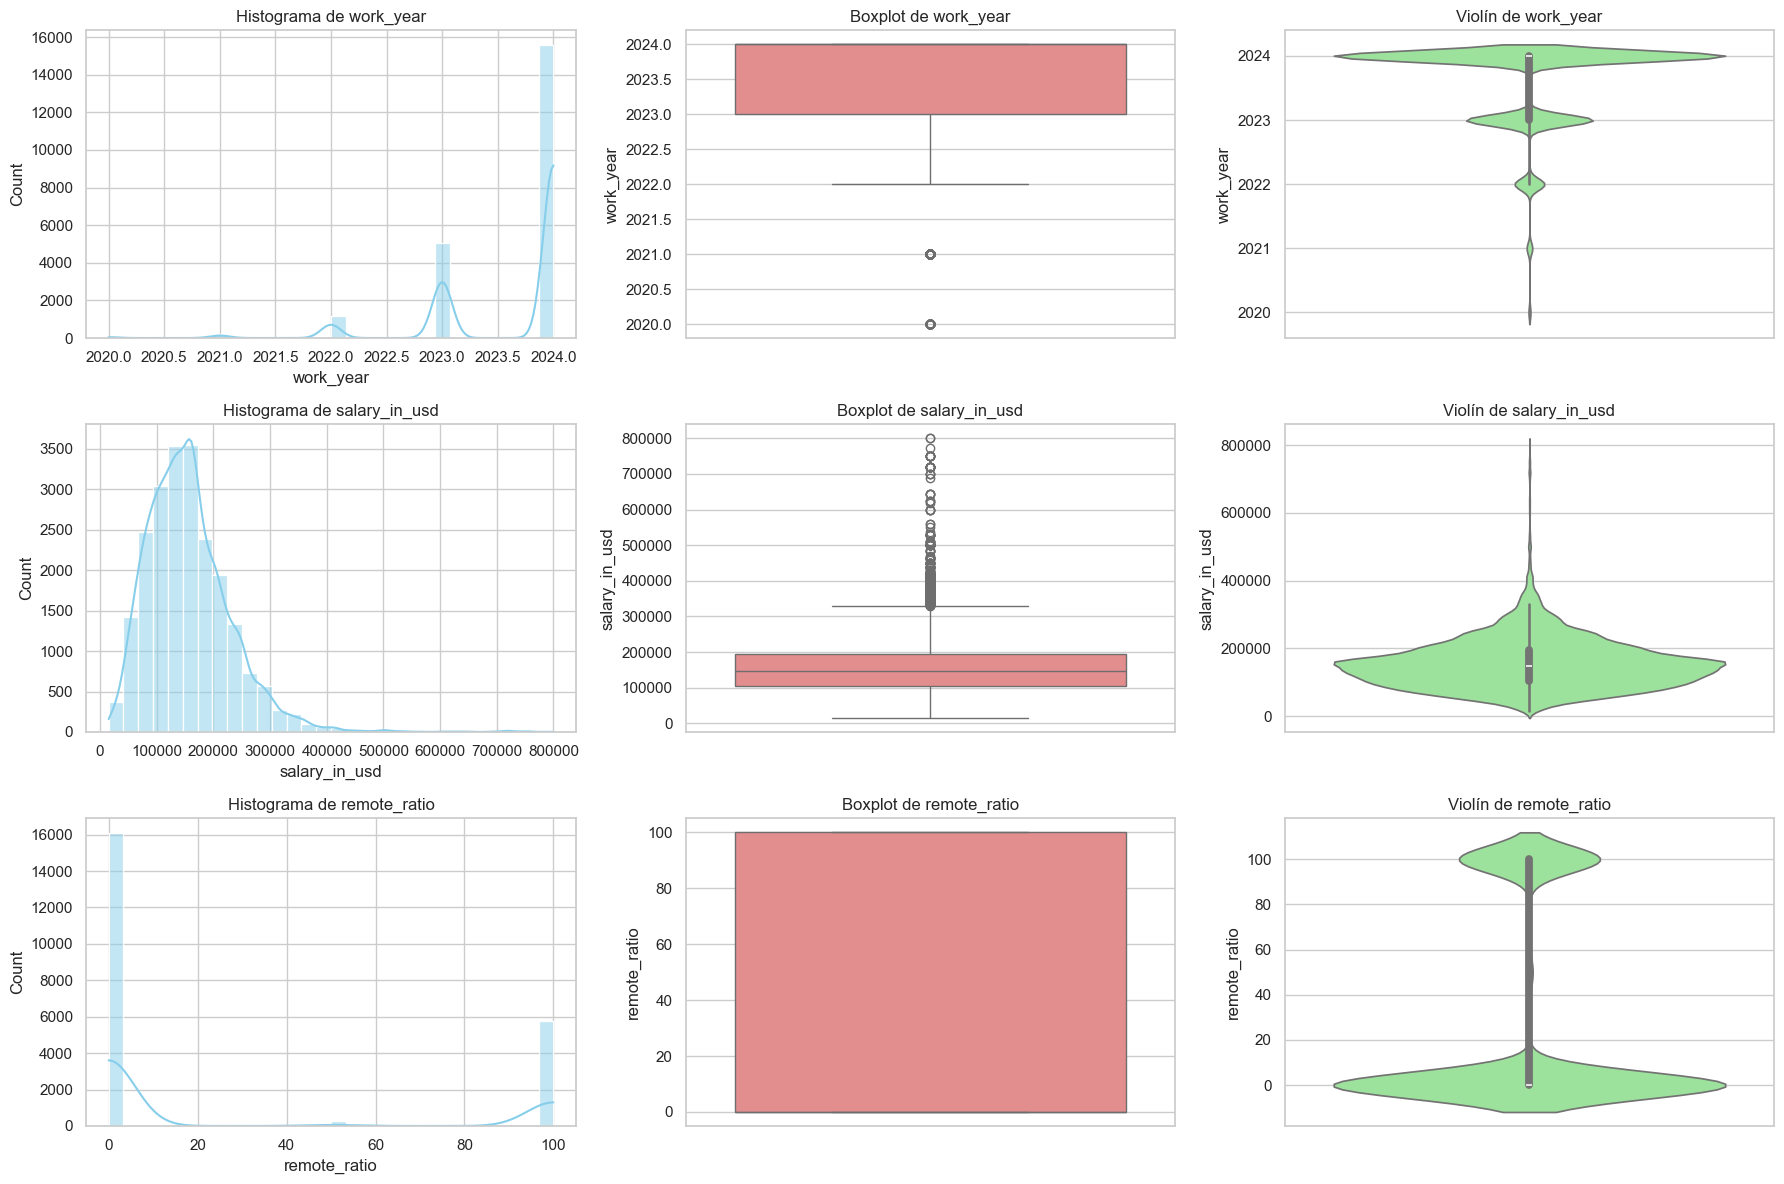

C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\690438211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df5[var], order=df5[var].value_counts().index, ax=axes[i // 2, i % 2], palette='muted')
C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\690438211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df5[var], order=df5[var].value_counts().index, ax=axes[i // 2, i % 2], palette='muted')
C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\690438211.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df5[var], order=df5[var

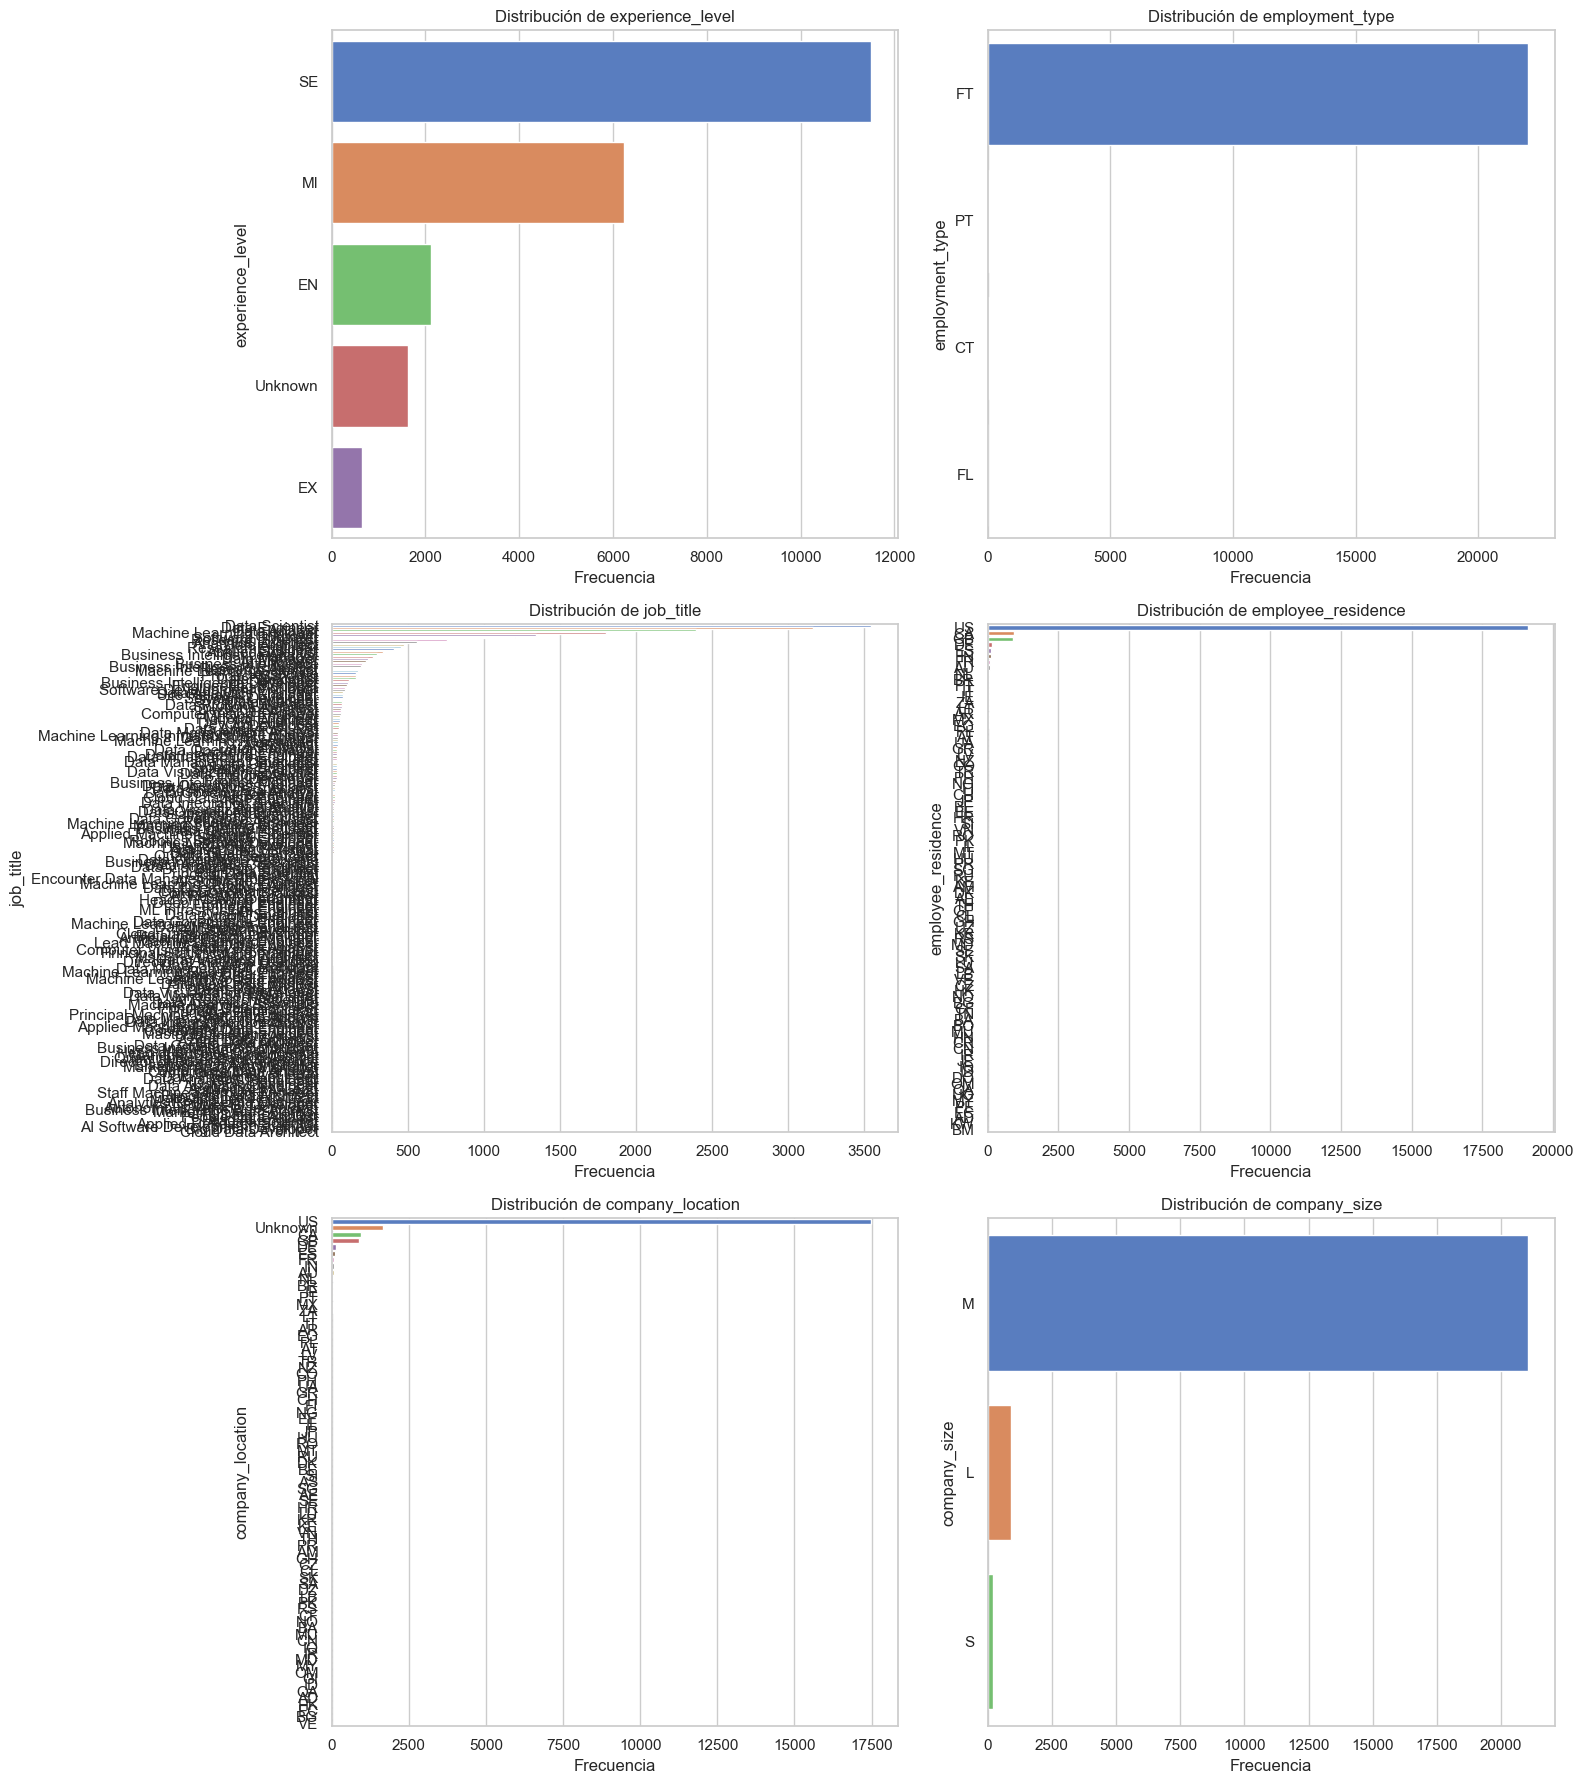

In [41]:
# Configurar tema de Seaborn de manera adecuada
sns.set_theme(style="whitegrid", palette="pastel")

# Variables numéricas: Histogramas, boxplots y violines
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
for i, var in enumerate(numericas):
    # Histograma
    sns.histplot(df5[var], kde=True, ax=axes[i, 0], bins=30, color='skyblue')
    axes[i, 0].set_title(f'Histograma de {var}')

    # Boxplot
    sns.boxplot(df5[var], ax=axes[i, 1], color='lightcoral')
    axes[i, 1].set_title(f'Boxplot de {var}')

    # Violín
    sns.violinplot(df5[var], ax=axes[i, 2], color='lightgreen')
    axes[i, 2].set_title(f'Violín de {var}')

plt.tight_layout()
plt.show()

# Variables categóricas: Gráficos de barras
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
for i, var in enumerate(categoricas):
    sns.countplot(y=df5[var], order=df5[var].value_counts().index, ax=axes[i // 2, i % 2], palette='muted')
    axes[i // 2, i % 2].set_title(f'Distribución de {var}')
    axes[i // 2, i % 2].set_xlabel('Frecuencia')
    axes[i // 2, i % 2].set_ylabel(var)

plt.tight_layout()
plt.show()


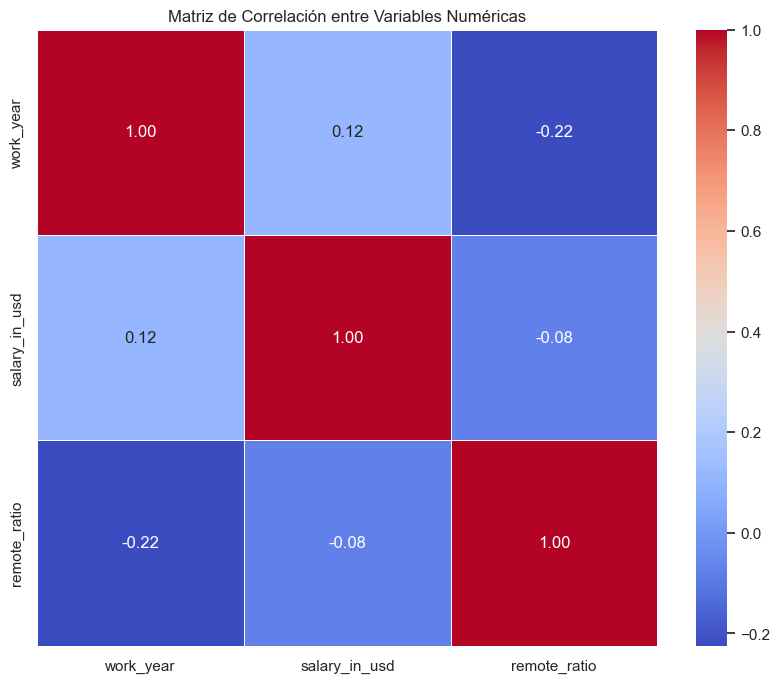

In [42]:
# Calcular la matriz de correlación
correlation_matrix = df5[numericas].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

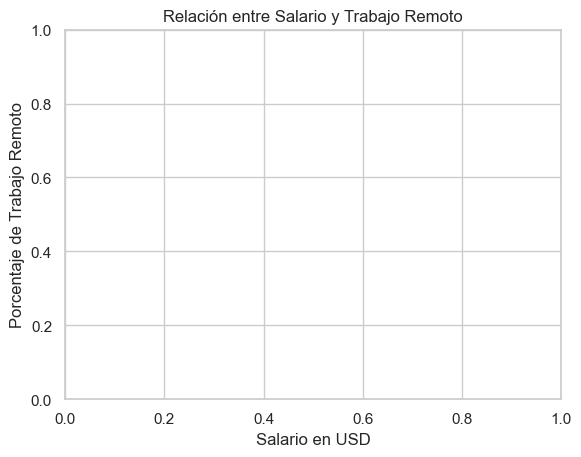

In [43]:
# Para visualizar la relación entre 'salary_in_usd' y 'remote_ratio'
plt.title('Relación entre Salario y Trabajo Remoto')
plt.xlabel('Salario en USD')
plt.ylabel('Porcentaje de Trabajo Remoto')
plt.show()


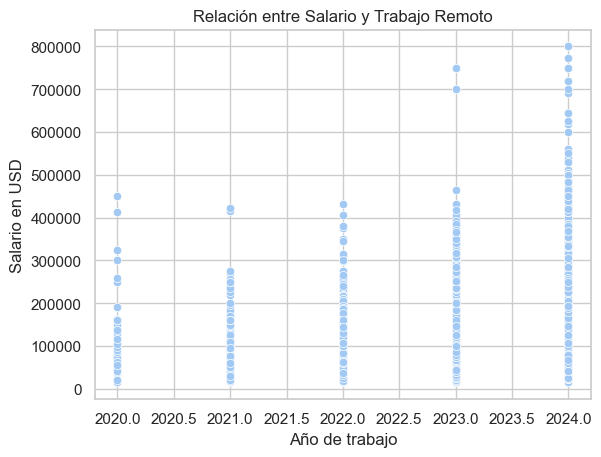

In [44]:
# Para visualizar la relación entre 'salary_in_usd' y 'remote_ratio'
sns.scatterplot(data=df5, x='work_year', y='salary_in_usd')
plt.title('Relación entre Salario y Trabajo Remoto')
plt.xlabel('Año de trabajo')
plt.ylabel('Salario en USD')
plt.show()


Registros originales: 22124, después del tratamiento: 21616


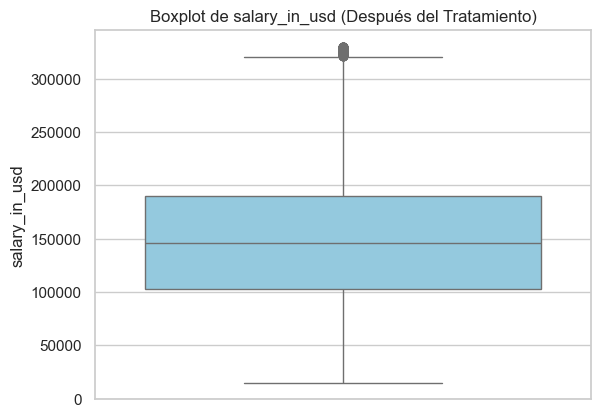

In [45]:
# Copia del dataset original para preservar los datos
df_tratado = df5.copy()

# Detectar y eliminar outliers en 'salary_in_usd' usando el método IQR
Q1 = df_tratado['salary_in_usd'].quantile(0.25)
Q3 = df_tratado['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df_tratado = df_tratado[
    (df_tratado['salary_in_usd'] >= lower_bound) &
    (df_tratado['salary_in_usd'] <= upper_bound)
]

# Verificar el resultado
print(f"Registros originales: {len(df5)}, después del tratamiento: {len(df_tratado)}")


# Boxplot después del tratamiento
sns.boxplot(data=df_tratado, y='salary_in_usd', color='skyblue')
plt.title('Boxplot de salary_in_usd (Después del Tratamiento)')
plt.show()



C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\3591134907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set2")
C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\3591134907.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set3", inner="quartile")


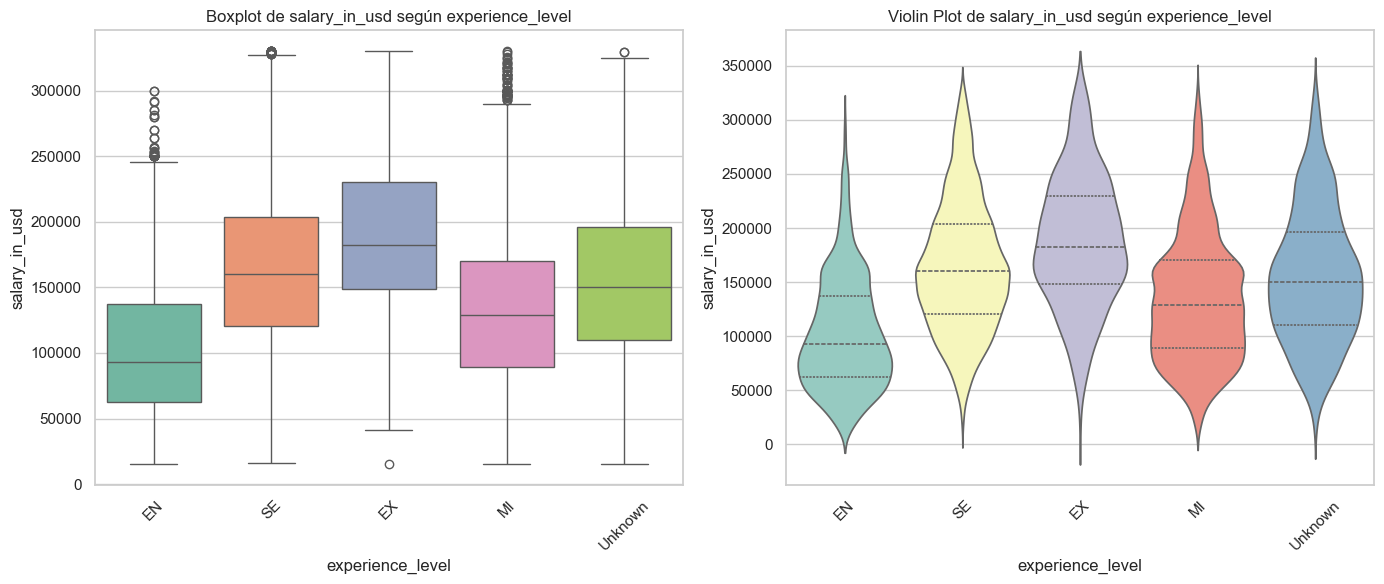

C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\3591134907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set2")
C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\3591134907.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set3", inner="quartile")


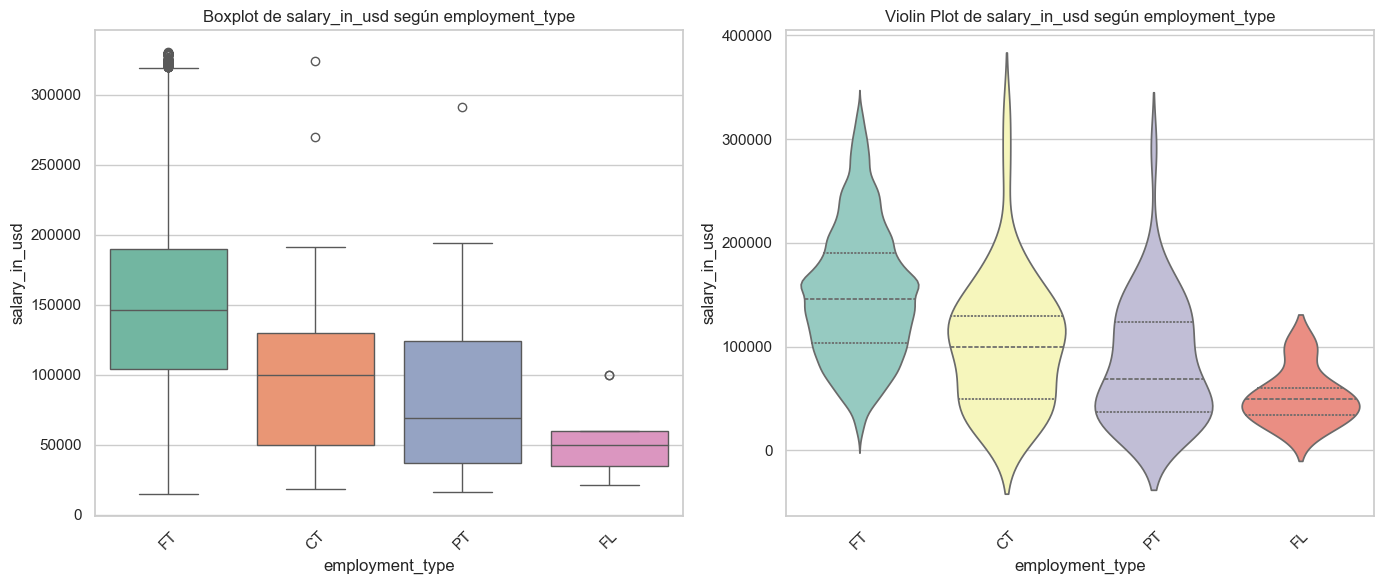

C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\3591134907.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set2")
C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\3591134907.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set3", inner="quartile")


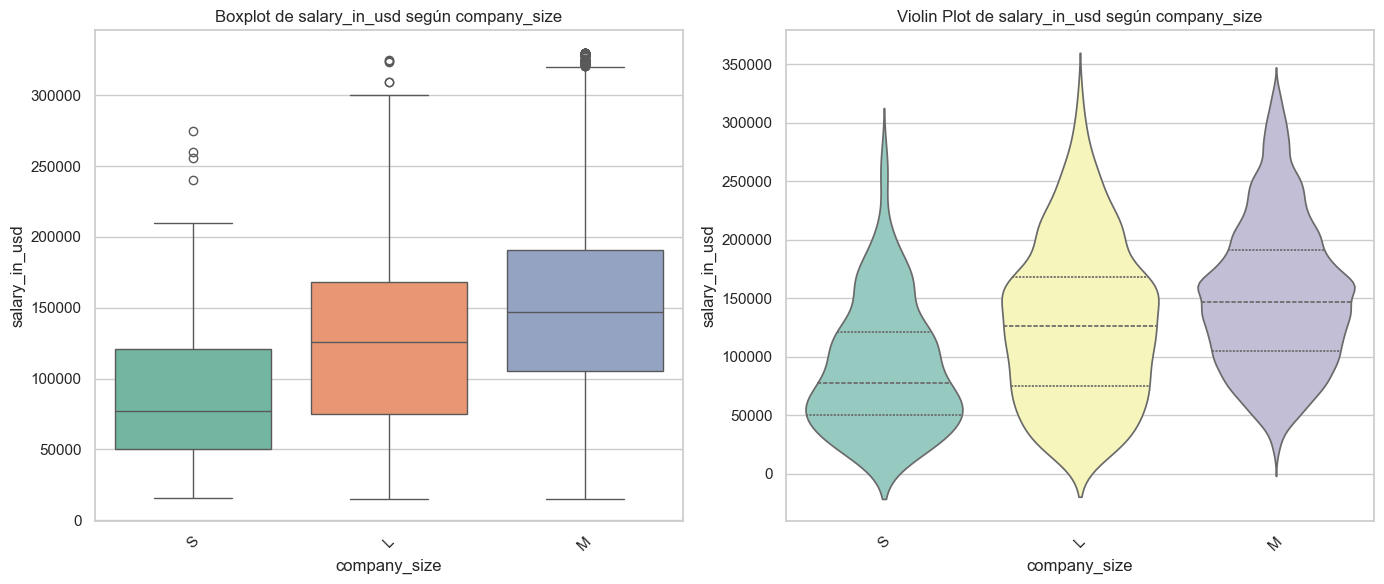

In [46]:
# Dataset limpio sin valores atípicos
numeric_column = 'salary_in_usd'
categorical_columns = ['experience_level', 'employment_type', 'company_size']

# Crear gráficos de boxplot y violines para cada variable categórica
for cat_col in categorical_columns:
    plt.figure(figsize=(14, 6))
    
    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set2")
    plt.title(f'Boxplot de {numeric_column} según {cat_col}')
    plt.xticks(rotation=45)
    
    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df_tratado, x=cat_col, y=numeric_column, palette="Set3", inner="quartile")
    plt.title(f'Violin Plot de {numeric_column} según {cat_col}')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


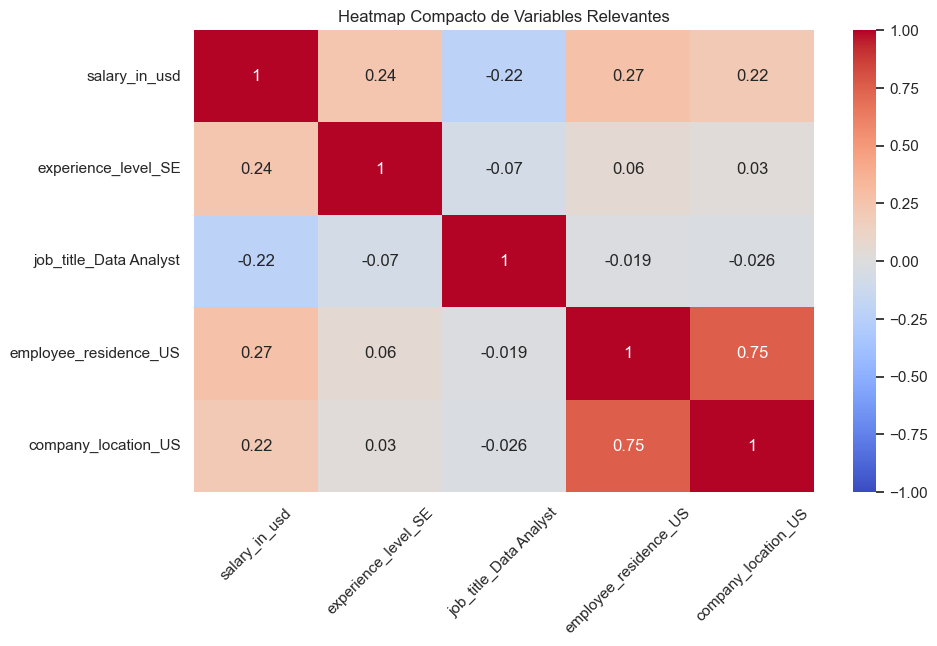

In [47]:
# Convertir variables categóricas a variables dummy
data_encoded = pd.get_dummies(df_tratado, drop_first=True)

# Generar una matriz de correlación
correlation_matrix = data_encoded.corr()

# Filtrar correlaciones significativas con salary_in_usd
threshold = 0.2  # Definir umbral de correlación
relevant_features = correlation_matrix['salary_in_usd'][
    correlation_matrix['salary_in_usd'].abs() > threshold
].index

# Crear un heatmap compacto con variables relevantes
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix.loc[relevant_features, relevant_features],
    annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True
)
plt.title("Heatmap Compacto de Variables Relevantes")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# 1. Crear una columna categórica de salario basado en la mediana
salary_median = df_tratado['salary_in_usd'].median()
df_tratado['salary_category'] = (df_tratado['salary_in_usd'] > salary_median).astype(int)

# 2. Dummificar las variables categóricas
data_encoded = pd.get_dummies(df_tratado.drop('salary_in_usd', axis=1), drop_first=True)

# 3. Separar características (X) y variable objetivo (y)
X = data_encoded.drop('salary_category', axis=1)
y = data_encoded['salary_category']

# 4. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear el modelo de regresión logística
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 6. Entrenar el modelo
log_model.fit(X_train, y_train)

# 7. Realizar predicciones
y_pred = log_model.predict(X_test)

# 8. Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[1358  819]
 [ 542 1605]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67      2177
           1       0.66      0.75      0.70      2147

    accuracy                           0.69      4324
   macro avg       0.69      0.69      0.68      4324
weighted avg       0.69      0.69      0.68      4324



c:\Users\ricar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


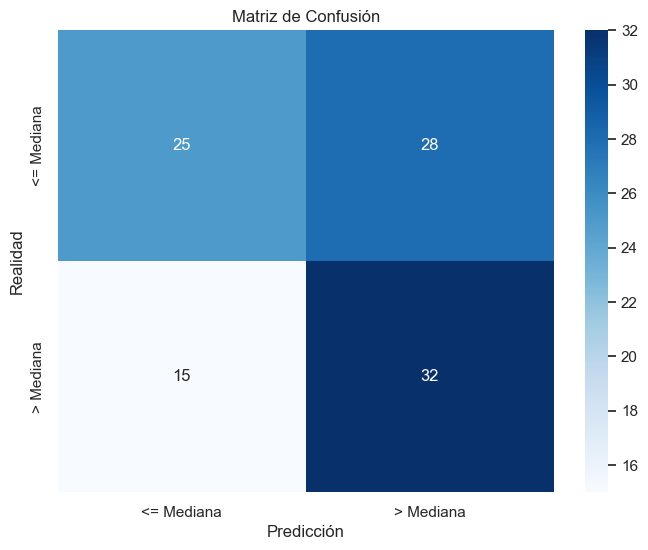


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.62      0.47      0.54        53
           1       0.53      0.68      0.60        47

    accuracy                           0.57       100
   macro avg       0.58      0.58      0.57       100
weighted avg       0.58      0.57      0.57       100



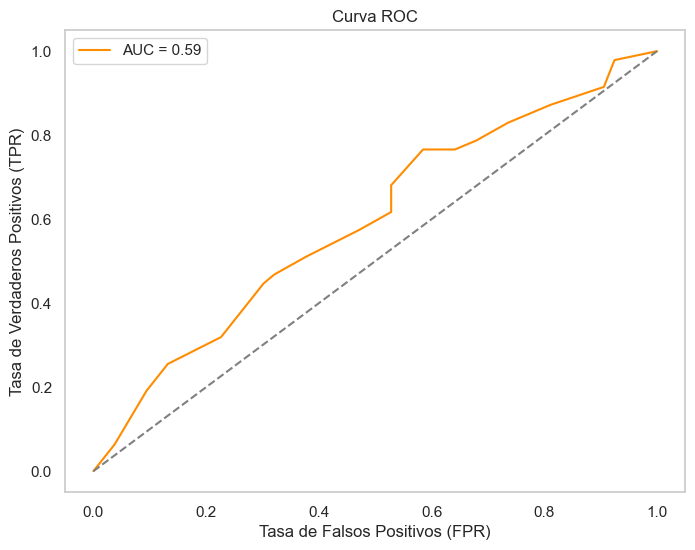

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que `df_tratado` ya está definido.
# Aquí simularé algunos datos ficticios para que el código funcione, ya que no tengo acceso a tus datos.

# Simular un DataFrame para el ejemplo
np.random.seed(42)
df_tratado = pd.DataFrame({
    'salary_in_usd': np.random.randint(30000, 150000, 500),
    'experience_level': np.random.choice(['Junior', 'Mid', 'Senior'], 500),
    'employment_type': np.random.choice(['Full-time', 'Part-time'], 500),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], 500)
})

# 1. Crear una columna categórica de salario basado en la mediana
salary_median = df_tratado['salary_in_usd'].median()
df_tratado['salary_category'] = (df_tratado['salary_in_usd'] > salary_median).astype(int)

# 2. Dummificar las variables categóricas
data_encoded = pd.get_dummies(df_tratado.drop('salary_in_usd', axis=1), drop_first=True)

# 3. Separar características (X) y variable objetivo (y)
X = data_encoded.drop('salary_category', axis=1)
y = data_encoded['salary_category']

# 4. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear el modelo de regresión logística
log_model = LogisticRegression(max_iter=1000, random_state=42)

# 6. Entrenar el modelo
log_model.fit(X_train, y_train)

# 7. Realizar predicciones
y_pred = log_model.predict(X_test)

# 8. Evaluar el modelo: Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficar la matriz de confusión como un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<= Mediana', '> Mediana'], yticklabels=['<= Mediana', '> Mediana'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Matriz de Confusión')
plt.show()

# 9. Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# 10. Curva ROC
y_proba = log_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Gráfico de pastel
fig = px.pie(df5, names='experience_level',title='Gráfico de pastel')
fig.show()

In [50]:
#Gráfico de barras
#Usar value_counts() para contar las ocurrencias de cada país
counts = df5['experience_level'].value_counts().reset_index()
counts.columns = ['experience_level','salary_in_usd']

fig= px.bar(counts, x='experience_level', y='salary_in_usd', title='Salario por experiencia',color='salary_in_usd')

fig.show()

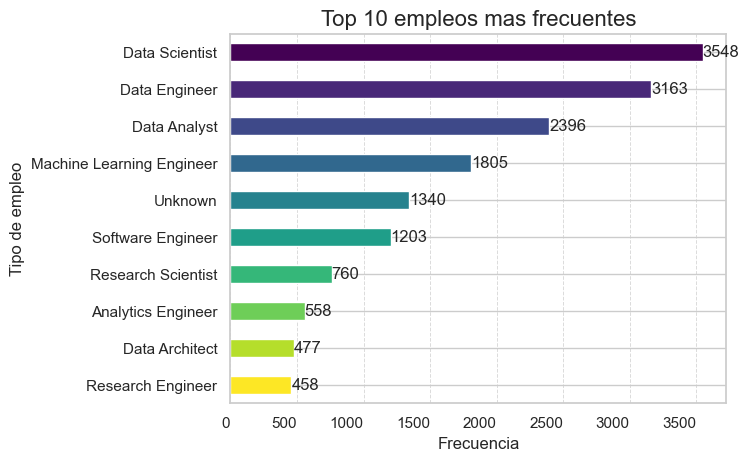

In [51]:
#Obtener las 10 edades mas comunes
top_10_edades=df5['job_title'].value_counts().nlargest(10)

#Definir una lista de colores para las barras
colors=plt.cm.viridis(np.linspace(0,1, len(top_10_edades)))


#Crear el grafico de barras horizontal con colores multiples
ax=top_10_edades.plot(kind='barh',color=colors)

#Añadir etiquetas al final de cada barra
for index,value in enumerate(top_10_edades):
    ax.text(value,index,str(value),va='center') #va='center' alinea verticalmente

#Personalizar el gráfico
plt.title('Top 10 empleos mas frecuentes', fontsize=16)
plt.xlabel('Frecuencia',fontsize=12)
plt.ylabel('Tipo de empleo',fontsize=12)

#Rotar etiquetas del eje X si es necesario
plt.xticks(rotation=0,ha='right')

#Añadir rejilla opcional
plt.grid(True,which='both',axis='x',linestyle='--',linewidth=0.7,alpha=0.7)

#Invertir el eje Y para que la barra mas alta este en la parte superior
plt.gca().invert_yaxis()

#Mostrar el gráfico
plt.show()

C:\Users\ricar\AppData\Local\Temp\ipykernel_4912\508467355.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




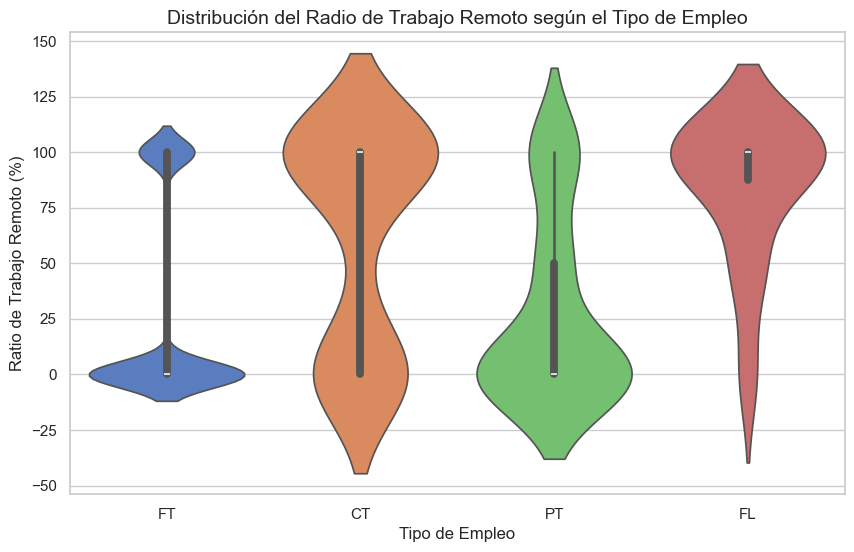

In [52]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Crear el gráfico de violín
sns.violinplot(data=df5, x="employment_type", y="remote_ratio", palette="muted")


# Configuración de etiquetas y título
plt.title("Distribución del Radio de Trabajo Remoto según el Tipo de Empleo", fontsize=14)
plt.xlabel("Tipo de Empleo", fontsize=12)
plt.ylabel("Ratio de Trabajo Remoto (%)", fontsize=12)

# Mostrar el gráfico
plt.show()